In [ ]:
import requests

def 다운로드(파일명, 링크):
    with open(파일명, "wb") as f:
        res = requests.get(링크)
        f.write(res.content)

파일명 = "팁.xlsx"
다운로드_링크 = "https://github.com/tyjeon24/keri-pythontraining/raw/main/Week%203/3-1/%ED%8C%81.xlsx"
다운로드(파일명, 다운로드_링크)

In [ ]:
!pip3 install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 폰트 설정

%matplotlib inline  

import os

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore') 

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕

if not os.path.exists(path):
    !apt-get update -qq
    !apt-get install fonts-nanum* -qq

font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)
fm._rebuild()
print(font_name)

# 한글 폰트가 적용이 안 되는 경우 런타임 - 런타임 다시 시작을 눌러 재시작할 것.

NanumGothic


# 1. scatterplot

1. 팁 데이터가 제공됩니다.
2. x축 가격, y축을 팁으로 하는 scatterplot을 그려보세요.

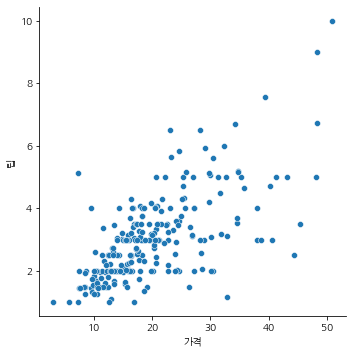

In [ ]:
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format # 소숫점 둘째자리까지 표현

### 이 사이에 코드 입력

팁_데이터 = pd.read_excel("팁.xlsx")

sns.relplot(x="가격",y="팁",data=팁_데이터)

###

# 2. 파라미터 추가하기

1. 흡연여부를 기준으로 색깔을 구분해보세요.
2. 팁 액수를 데이터가 표현되는 크기에 반영해보세요.


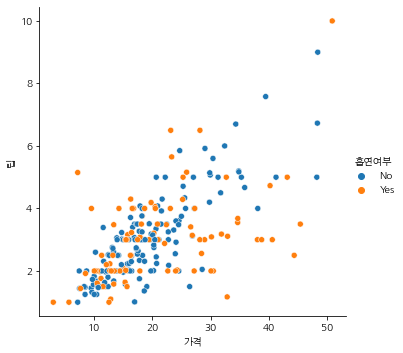

In [ ]:
### 이 사이에 코드 입력

sns.relplot(x="가격",y="팁", data=팁_데이터, hue="흡연여부")

###

# 3. 그래프 다중 표현

1. 다음 조건을 만족하는 차트를 그려보세요.
2. 색깔 : 흡연여부로 구분
3. 행 : 요일로 구분
4. 열 : 시간대로 구분


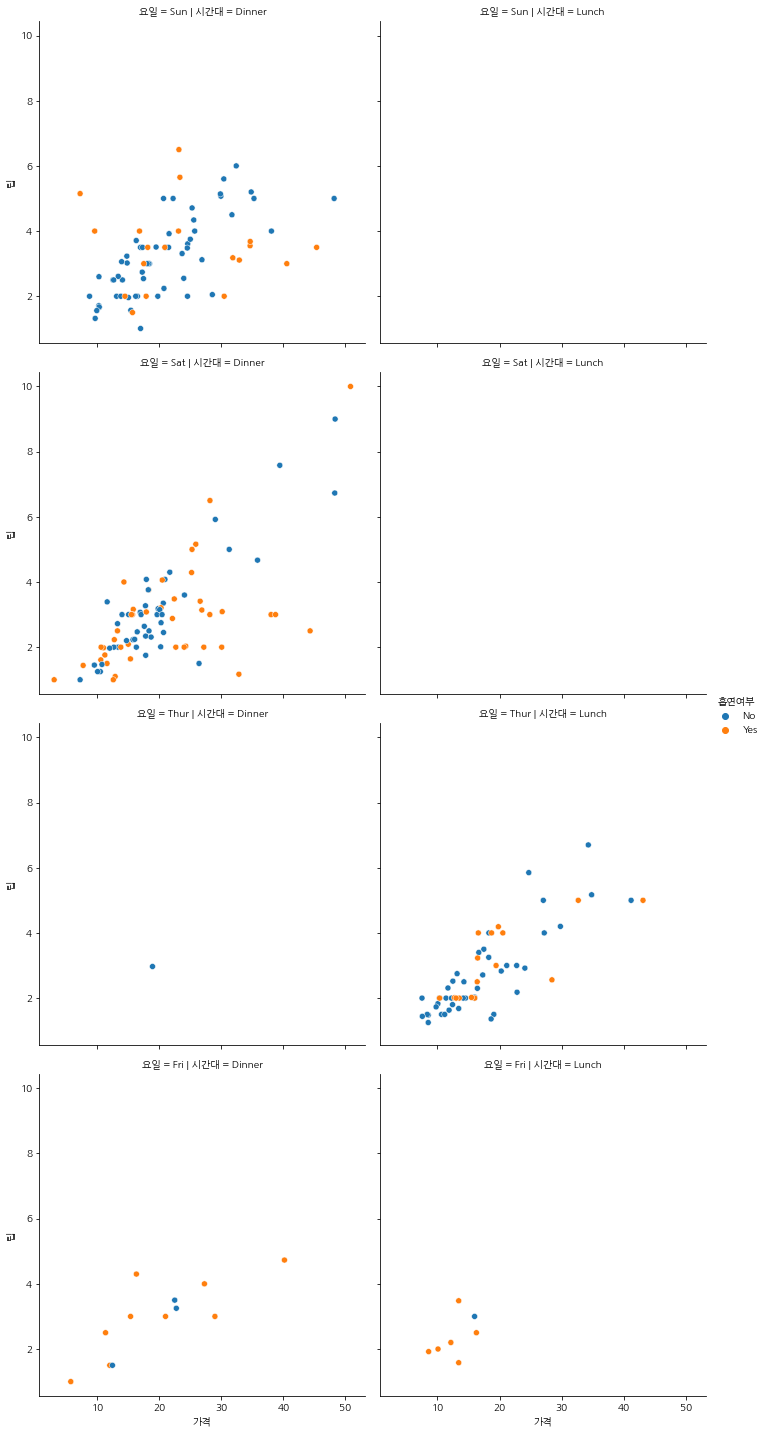

In [ ]:
### 이 사이에 코드 입력

sns.relplot(x="가격",y="팁", data=팁_데이터, hue="흡연여부", row="요일", col="시간대")

###

# 4. lineplot

1. 마이크로소프트의 주식 데이터가 제공됩니다.
2. x축을 기간, y축을 가격으로 하는 lineplot을 그려보세요.
3. 색깔 구분을 추가해보세요.

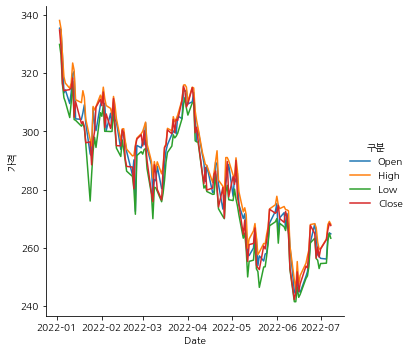

In [ ]:
import yfinance as yf

df = yf.download("MSFT", start="2022-01-01", progress=False)
df = df.reset_index()
df = df.drop("Volume", axis=1)
df = df.drop("Adj Close", axis=1)
주식_데이터 = df.melt("Date", var_name = "구분", value_name = "가격")


### 이 사이에 코드 입력

주식_데이터

sns.relplot(x="Date", y="가격", data=주식_데이터, kind="line", hue = "구분")

###